
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 14: Machine Learning (Model Evaluation and Selection I)📈🤖**</h1>
</div>


These exercises will provide hands-on experience with evaluating model performance, handling overfitting and underfitting, and using various metrics for classification problems.


**Deadline: 25 July 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 📈**

##   **Dataset** :**Titanic Dataset**

---

### 1. **Evaluating Logistic Regression with Cross-Validation** 📉

**Exercise:**  
- Implement logistic regression and evaluate the model using k-fold cross-validation.
- Compare the cross-validation scores with a single train-test split evaluation.

---

### 2. **Analyzing Overfitting and Underfitting in Decision Trees** 🌲

**Exercise:**  
- Train a decision tree classifier with varying depths to analyze overfitting and underfitting.
- Plot training and validation accuracies to visualize the effects.

---

### 3. **Calculating Precision, Recall, and F1-Score for Logistic Regression** 📊

**Exercise:**  
- Implement logistic regression and calculate precision, recall, and F1-score for the model.
- **Tip:** Discuss how these metrics provide insights into model performance in your week article.

---

### 4. **ROC Curve Analysis for Decision Trees** 📈

**Exercise:**  
- Implement a decision tree classifier and plot the ROC curve.
- Compute the AUC (Area Under the Curve) and interpret the results.

---

### 5. **Comparing Model Performance with and without Cross-Validation** ⚖️

**Exercise:**  
- Train logistic regression and decision tree models with and without cross-validation.
- Compare their performance metrics, including accuracy, precision, and recall.

---


---

## **Let's get started!**

**Since this task focuses on evaluation, I'll concentrate solely on that aspect, removing any extraneous details. For a comprehensive analysis on titanic dataset, you can refer to my detailed work in another task available at:**

GitHub Link: [Task_11_ML_Classification_Algorithms_I](https://github.com/mmoneka11/100DaysOfBytewise/blob/main/Week-6/Task-11_ML-Classification%20Algorithms-I/Task_11_ML_Classification_Algorithms_I.ipynb).





### Importing Necessary Libraries

In [1]:
# Necessary Libraries/Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Exploration and Preprocessing


#### Load the dataset

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#### Overview

In [ ]:
# Basic statistics and information about the dataset

display('Shape of Data:',titanic_df.shape)
display('Columns:', titanic_df.columns)
display('Data types:',titanic_df.dtypes)
display('Preview of data -Head:',titanic_df.head())
display('Preview of data -Tail:',titanic_df.tail())
display('Info:',titanic_df.info())
display('Summary Stats:',titanic_df.describe())
display('Missing Values:',titanic_df.isnull().sum())
display('Missing Values (%):',titanic_df.isnull().sum()/titanic_df.shape[0]*100)
# display('Unique Values:',titanic_df.nunique())
display('Duplicate Values:',titanic_df.duplicated().sum())

'Shape of Data:'

(891, 12)

'Columns:'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Data types:'

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


'Preview of data -Head:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Preview of data -Tail:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'Info:'

None

'Summary Stats:'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Missing Values:'

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


'Missing Values (%):'

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


'Duplicate Values:'

0

#### Data Cleaning



- Removing Unnecessary Columns


In [3]:
# Dropping the 'Passenger' column in place
titanic_df.drop('PassengerId', axis=1, inplace=True)

# Displaying the updated DataFrame
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Handling missing values


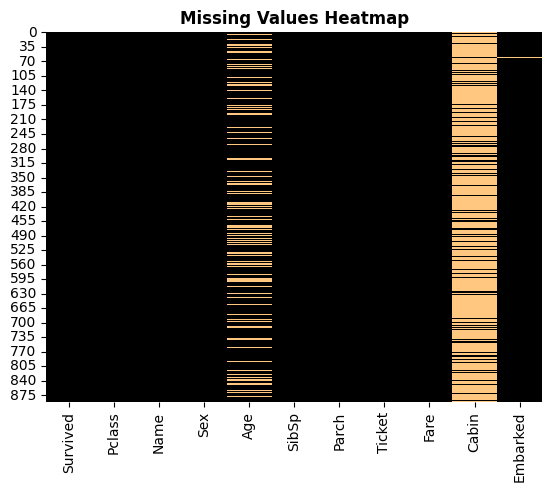

In [ ]:
# Visualizing the heatmap of missing values
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='copper')
plt.title('Missing Values Heatmap', fontweight='bold')
plt.show()

There are three columns with missing values that need to be addressed.





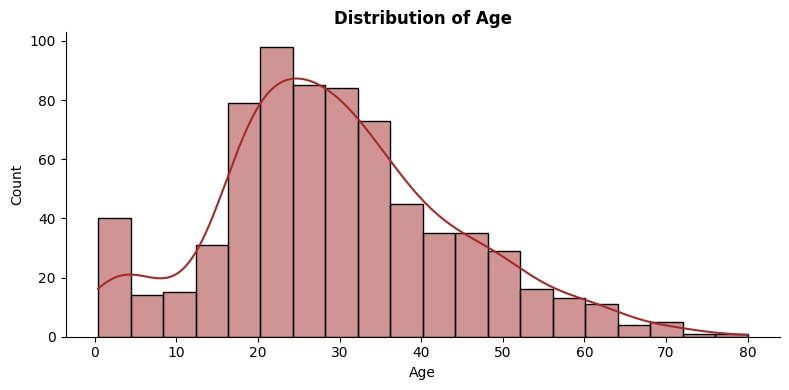

In [ ]:
# Checking the distribution of the Age column
sns.displot(titanic_df['Age'],kde = True,height = 4,aspect = 2, color ='brown')
plt.title('Distribution of Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From the above visualization, we observe a skewed distribution. Therefore, we will handle the null values using the median.





In [4]:
# For 'Age', we can use median imputation
imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])

In [5]:
# For 'Embarked', we can use the mode imputation i.e fill with  most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [6]:
# Dropping 'Cabin', because it has more than 50% null values
titanic_df.drop('Cabin', axis=1, inplace=True)

- Removing duplicates


In [ ]:
# Again checking duplicates as we've manipulated the dataframe
# Checking for duplicated rows
# titanic_df[titanic_df.duplicated()]
# titanic_df.duplicated()
titanic_df.duplicated().sum()

0


There is no need to remove duplicates since there are none.

In [ ]:
# Verifying processed data
display(titanic_df.info())
display(titanic_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
780,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,C
724,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,S
247,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
443,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,S


#### Feature Encoding


In [7]:
# Applying One Hot Encoding

# Initializing the encoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
# Converting categorical columns to numerical using OneHotEncoder
titanic_df = pd.concat([titanic_df.drop(['Sex', 'Embarked'], axis=1),
                        pd.DataFrame(encoder.fit_transform(titanic_df[['Sex', 'Embarked']]),
                                     columns=encoder.get_feature_names_out(['Sex', 'Embarked']))],
                       axis=1)
# Displaying the updated DataFrame
titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,1.0


#### Feature Scaling

In [8]:
# Initializing scaler
scaler = StandardScaler()
# Standardize numerical features
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])
titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,1.0,0.0,1.0


#### Feature Selection


- Keep: Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S because they are numeric or already encoded.
- Remove: Name, Ticket because they do not provide meaningful numerical information for the model.

#### Data Preparation

In [9]:
# Defining features and target variable
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q','Embarked_S']
target = 'Survived'

# Separating features and target
X = titanic_df[features]
y = titanic_df[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Now, let's tackle each of these exercises step-by-step!!*

### 1. Evaluating Logistic Regression with Cross-Validation 📉
- Implement logistic regression and evaluate the model using k-fold cross-validation.
- Compare the cross-validation scores with a single train-test split evaluation.

In [11]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict & Evaluate on test set
y_pred = logreg.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

# Cross-Validation
# cv_scores = cross_val_score(logreg, X, y, cv=5)
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Evaluating Logistic Regression with Cross-Validation (k-fold cross-validation)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores: ", cv_scores)
print("Mean CV Accuracy: ", np.mean(cv_scores))

Test Accuracy: 0.8100558659217877
Logistic Regression Cross-Validation Scores:  [0.81818182 0.81118881 0.78873239 0.73943662 0.79577465]
Mean CV Accuracy:  0.7906628582684921



Based on the results:

- The cross-validation avg accuracy is 0.7946, indicating that the model performs well on average across the 5 folds.
- The test accuracy from a train-test split is 0.81, which is slightly higher than the cross-validation accuracy.

This suggests that the model's performance on the test set is slightly better than what was averaged across the cross-validation folds. This could indicate that the model performed particularly well on the specific test data, or it could reflect some variability in the test set's characteristics compared to the cross-validation folds.

The variability in the cross-validation scores, with the lowest at 79.94% and the highest at 81.82%, shows that the model's performance varied across different subsets of the data. This is a normal outcome, reflecting the different characteristics of each fold's data.

### 2. Analyzing Overfitting and Underfitting in Decision Trees 🌲

- Train a decision tree classifier with varying depths to analyze overfitting and underfitting.
- Plot training and validation accuracies to visualize the effects.


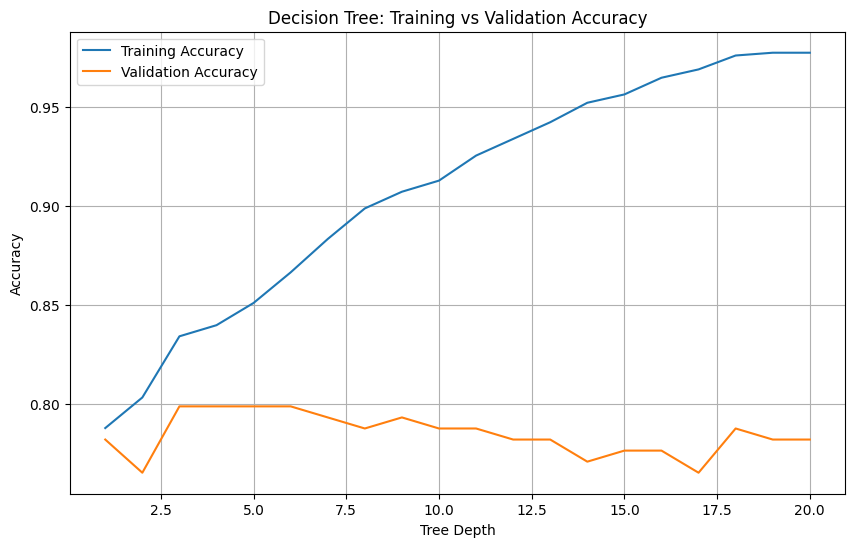

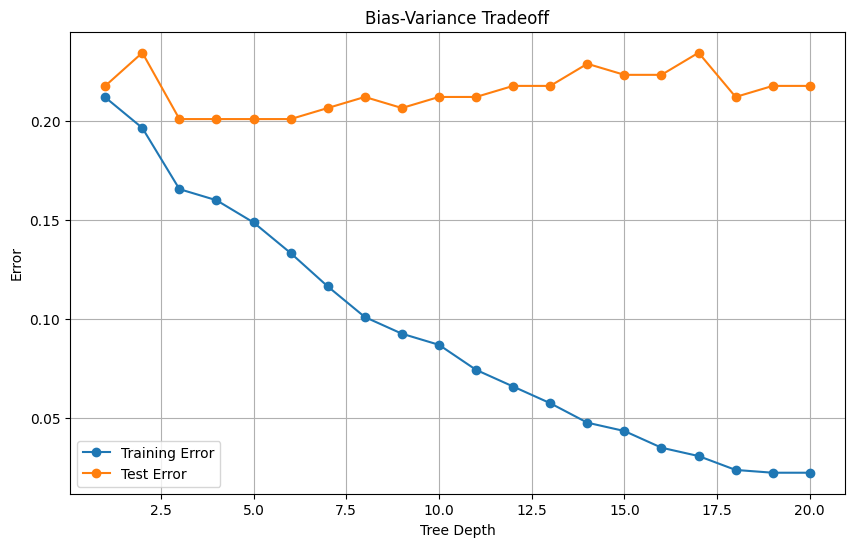

In [15]:
# Decision Tree Model with varying depths
depths = range(1, 21)  # None means unlimited depth
train_accuracies = []
val_accuracies = []
train_errors = []
test_errors = []

for depth in depths:
    dtree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree_model.fit(X_train, y_train)

    # Evaluating the model

    # Training error
    train_errors.append(1 - accuracy_score(y_train, dtree_model.predict(X_train)))
    # Validation accuracy
    test_errors.append(1 - accuracy_score(y_test, dtree_model.predict(X_test)))

    # Training error
    train_accuracies.append(dtree_model.score(X_train, y_train))
    # Validation accuracy
    val_accuracies.append(dtree_model.score(X_test, y_test))


# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot errors
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Test Error', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

- We observe that the training accuracy increases as the depth of the Decision Tree grows. This is expected, as a deeper tree has more capacity to fit the training data more closely. However, the test accuracy reaches its highest point at a tree depth of 3 to approx: 6 and subsequently decreases with further increases in depth. This pattern indicates that while deeper trees fit the training data very well, they start to overfit as the depth increases. Overfitting occurs when the model becomes too complex and starts capturing noise and details that are specific to the training set, which impairs its performance on unseen data.


- In this, as the depth of the decision tree increases, the training error decreases (model complexity increases, which reduces bias but might increase variance). The test error decreases to a point and then starts increasing, illustrating the tradeoff between bias and variance.

### 3. Calculating Precision, Recall, and F1-Score for Logistic Regression 📊

- Implement logistic regression and calculate precision, recall, and F1-score for the model.


In [16]:
# Evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_name, model_name):
    """
    Print evaluation metrics for a given dataset and model.
    """
    print(f"Metrics for {model_name} on {dataset_name} data:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\n")

# Taking `logreg` which is fitted Logistic Regression model
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)    # Predict on the test set

# Printing evaluation metrics for training data
print_evaluation_metrics(y_train, y_train_pred, "training", "Logistic Regression")

# Printing evaluation metrics for testing data
print_evaluation_metrics(y_test, y_test_pred, "testing",  "Logistic Regression")

Metrics for Logistic Regression on training data:
Accuracy: 0.8006
Precision: 0.7984
Recall: 0.8006
F1 Score: 0.7985


Metrics for Logistic Regression on testing data:
Accuracy: 0.8101
Precision: 0.8092
Recall: 0.8101
F1 Score: 0.8092




### 4. ROC Curve Analysis for Decision Trees 📈

- Implement a decision tree classifier and plot the ROC curve. Compute the AUC (Area Under the Curve) and interpret the results.


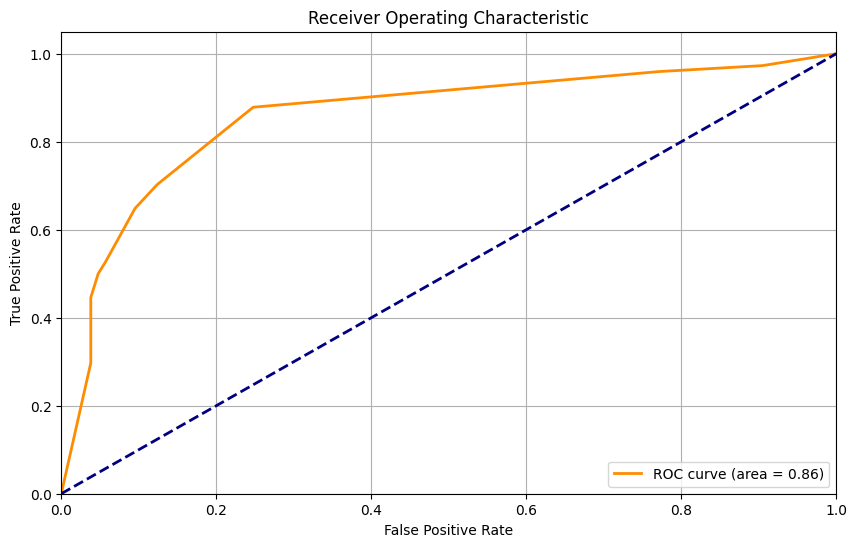

ROC AUC: 0.8587516087516087


In [17]:
# Fitting the model on training data
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predicting probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC: {roc_auc}")

#### **ROC Curve Interpretation**

The Receiver Operating Characteristic (ROC) curve is an essential tool for assessing the performance of a binary classification model. It plots the true positive rate (TPR) against the false positive rate (FPR) across different classification thresholds. Here’s how to interpret the ROC curve and the Area Under the Curve (AUC) score in our model's context:

- **X-Axis (False Positive Rate - FPR):** Represents the proportion of negative samples incorrectly classified as positive. It indicates how often the model mistakenly labels negative instances as positive.

- **Y-Axis (True Positive Rate - TPR):** Shows the proportion of positive samples correctly classified as positive. It measures the model’s ability to detect positive instances.

- **Blue Dashed Line (Random Chance):** Represents the baseline performance of random guessing. If the ROC curve is at this level, it means the model is performing no better than random chance.

- **Orange Line (ROC Curve of the Model):** Demonstrates the performance of your model across various classification thresholds. The closer this curve is to the top-left corner, the better the model’s performance in distinguishing between positive and negative samples.

- **AUC (Area Under the Curve):** Provides a single value summarizing the model's performance. It ranges from 0 to 1, where:
  - **1** indicates perfect classification.
  - **0.5** indicates random guessing.
  - **0.8588** (in our case) suggests a high level of performance.

#### Performance Analysis

- **AUC Score (0.8588):** An AUC of approximately 0.86 is an excellent result, indicating that the model has a strong ability to distinguish between positive and negative instances. This score is well above the threshold for good performance, which generally starts at 0.7. The higher the AUC, the better the model’s overall performance.

- **Curve Analysis:**
  - The ROC curve being close to the top-left corner and the high AUC score demonstrate that the model performs exceptionally well, balancing the trade-off between true positive and false positive rates effectively.
  - The high AUC indicates that the model is very effective in classifying positive and negative cases and has a low rate of false positives and false negatives.

#### Summary

The ROC curve and the AUC score provide a comprehensive view of the model’s classification performance. With an AUC of 0.8588, your model shows robust discriminative power and is very effective in distinguishing between the classes. This performance indicates that the model is reliable and performs well across different thresholds. While the model already exhibits high performance, further optimization and fine-tuning could potentially enhance its effectiveness even more.

### 5. Comparing Model Performance with and without Cross-Validation ⚖️

- Train logistic regression and decision tree models with and without cross-validation. Compare their performance metrics, including accuracy, precision, and recall.


In [20]:
# Logistic Regression without Cross-Validation
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression without Cross-Validation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
# print(f"F1-Score: {f1_score(y_test, y_pred_lr)}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_lr))

# Decision Tree without Cross-Validation
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("\nDecision Tree without Cross-Validation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
# print(f"F1-Score: {f1_score(y_test, y_pred_dt)}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_dt))

# Logistic Regression with Cross-Validation
cv_scores_lr = cross_val_score(model_lr, X, y, cv=5)
print(f"\nLogistic Regression Cross-Validation Scores: {cv_scores_lr}")
print(f"Mean CV Score: {cv_scores_lr.mean()}")

# Decision Tree with Cross-Validation
cv_scores_dt = cross_val_score(model_dt, X, y, cv=5)
print(f"\nDecision Tree Cross-Validation Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean()}")

Logistic Regression without Cross-Validation:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432

Decision Tree without Cross-Validation:
Accuracy: 0.7988826815642458
Precision: 0.8275862068965517
Recall: 0.6486486486486487

Logistic Regression Cross-Validation Scores: [0.7877095  0.78651685 0.78651685 0.76966292 0.8258427 ]
Mean CV Score: 0.7912497646098802

Decision Tree Cross-Validation Scores: [0.81005587 0.82022472 0.81460674 0.76404494 0.85393258]
Mean CV Score: 0.8125729709371665


**Summary of Interpretation**

***Model Performance without Cross-Validation:***

- Logistic Regression has slightly higher accuracy and recall, making it better at identifying positive instances.
- Decision Tree excels in precision, suggesting it makes fewer false positive predictions but at the cost of lower recall.

***Cross-Validation Comparison:***

- Decision Tree achieves a higher mean cross-validation accuracy (81.3%) compared to Logistic Regression (79.1%), indicating better overall generalization to unseen data.

In conclusion, both models demonstrate strong performance. The choice between them may depend on specific needs:

- Logistic Regression might be preferred for its balance between precision and recall.

- Decision Tree could be favored for its higher precision, especially when minimizing false positives is critical, despite its lower recall.
Cross-validation results suggest that the Decision Tree generally provides better performance across different subsets of the data.



---



## **Conclusion**

In this analysis, I evaluated and compared the performance of two machine learning models—Logistic Regression and Decision Tree Classifier—using the Iris dataset and various evaluation metrics. Here’s a summary of the findings:

- Logistic Regression Evaluation: Compared cross-validation scores with train-test split accuracy to assess model performance and generalizability.
- Decision Tree Analysis: Examined how tree depth influences training and validation accuracy, providing insights into model complexity and overfitting.
- Precision, Recall, and F1-Score: Calculated these metrics for Logistic Regression to understand its balance between precision and recall, and overall effectiveness.
- ROC Curve Analysis: Plotted the ROC curve and computed the AUC for the Decision Tree Classifier to evaluate its ability to distinguish between positive and negative classes.
- Model Comparison: Compared performance metrics with and without cross-validation for both Logistic Regression and Decision Tree Classifier, revealing insights into their strengths and weaknesses.

This comprehensive approach offers a detailed view of each model's performance and provides guidance on how to interpret and utilize their results effectively.

## **Acknowledgment**

For a deeper understanding of pipeline construction and best practices in model evaluation, I refer to the insightful guide provided by Medium's article on [Building Scikit-Learn pipelines](https://medium.com/analytics-vidhya/zero-to-pipeline-beginners-guide-to-building-a-scikit-learn-pipeline-to-predict-survival-on-the-bd9730f6f13b). This resource was instrumental in guiding the approach to model training and evaluation, offering valuable techniques for effectively managing machine learning workflows.
The guide’s thorough coverage of pipeline creation and model validation strategies has significantly contributed to the robustness of this analysis.

Thank you to the authors for their contribution to enhancing practical data science skills.